## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [3]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

'''boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])'''

boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns=['medv']).copy()
y = boston[['medv']]

In [5]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [7]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [9]:
matriz_corr = boston.corr()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [13]:
regr_1 = DecisionTreeRegressor(max_depth=3)
regr_2 = DecisionTreeRegressor(max_depth=5)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [15]:
mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse2 = mean_squared_error(y_test, regr_2.predict(X_test))

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=3 é: 18,58
O MSE da árvore com profundidade=5 é: 18,43


In [17]:
regr_1 = DecisionTreeRegressor(max_depth=3)
regr_2 = DecisionTreeRegressor(max_depth=5)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [19]:
r_quadrado1 = regr_1.score(X_train, y_train)
r_quadrado2 = regr_2.score(X_train, y_train)

template = "O r-quadrado da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),r_quadrado1).replace(".",","))
print(template.format(regr_2.get_depth(),r_quadrado2).replace(".",","))

O r-quadrado da árvore com profundidade=3 é: 0,80
O r-quadrado da árvore com profundidade=5 é: 0,91


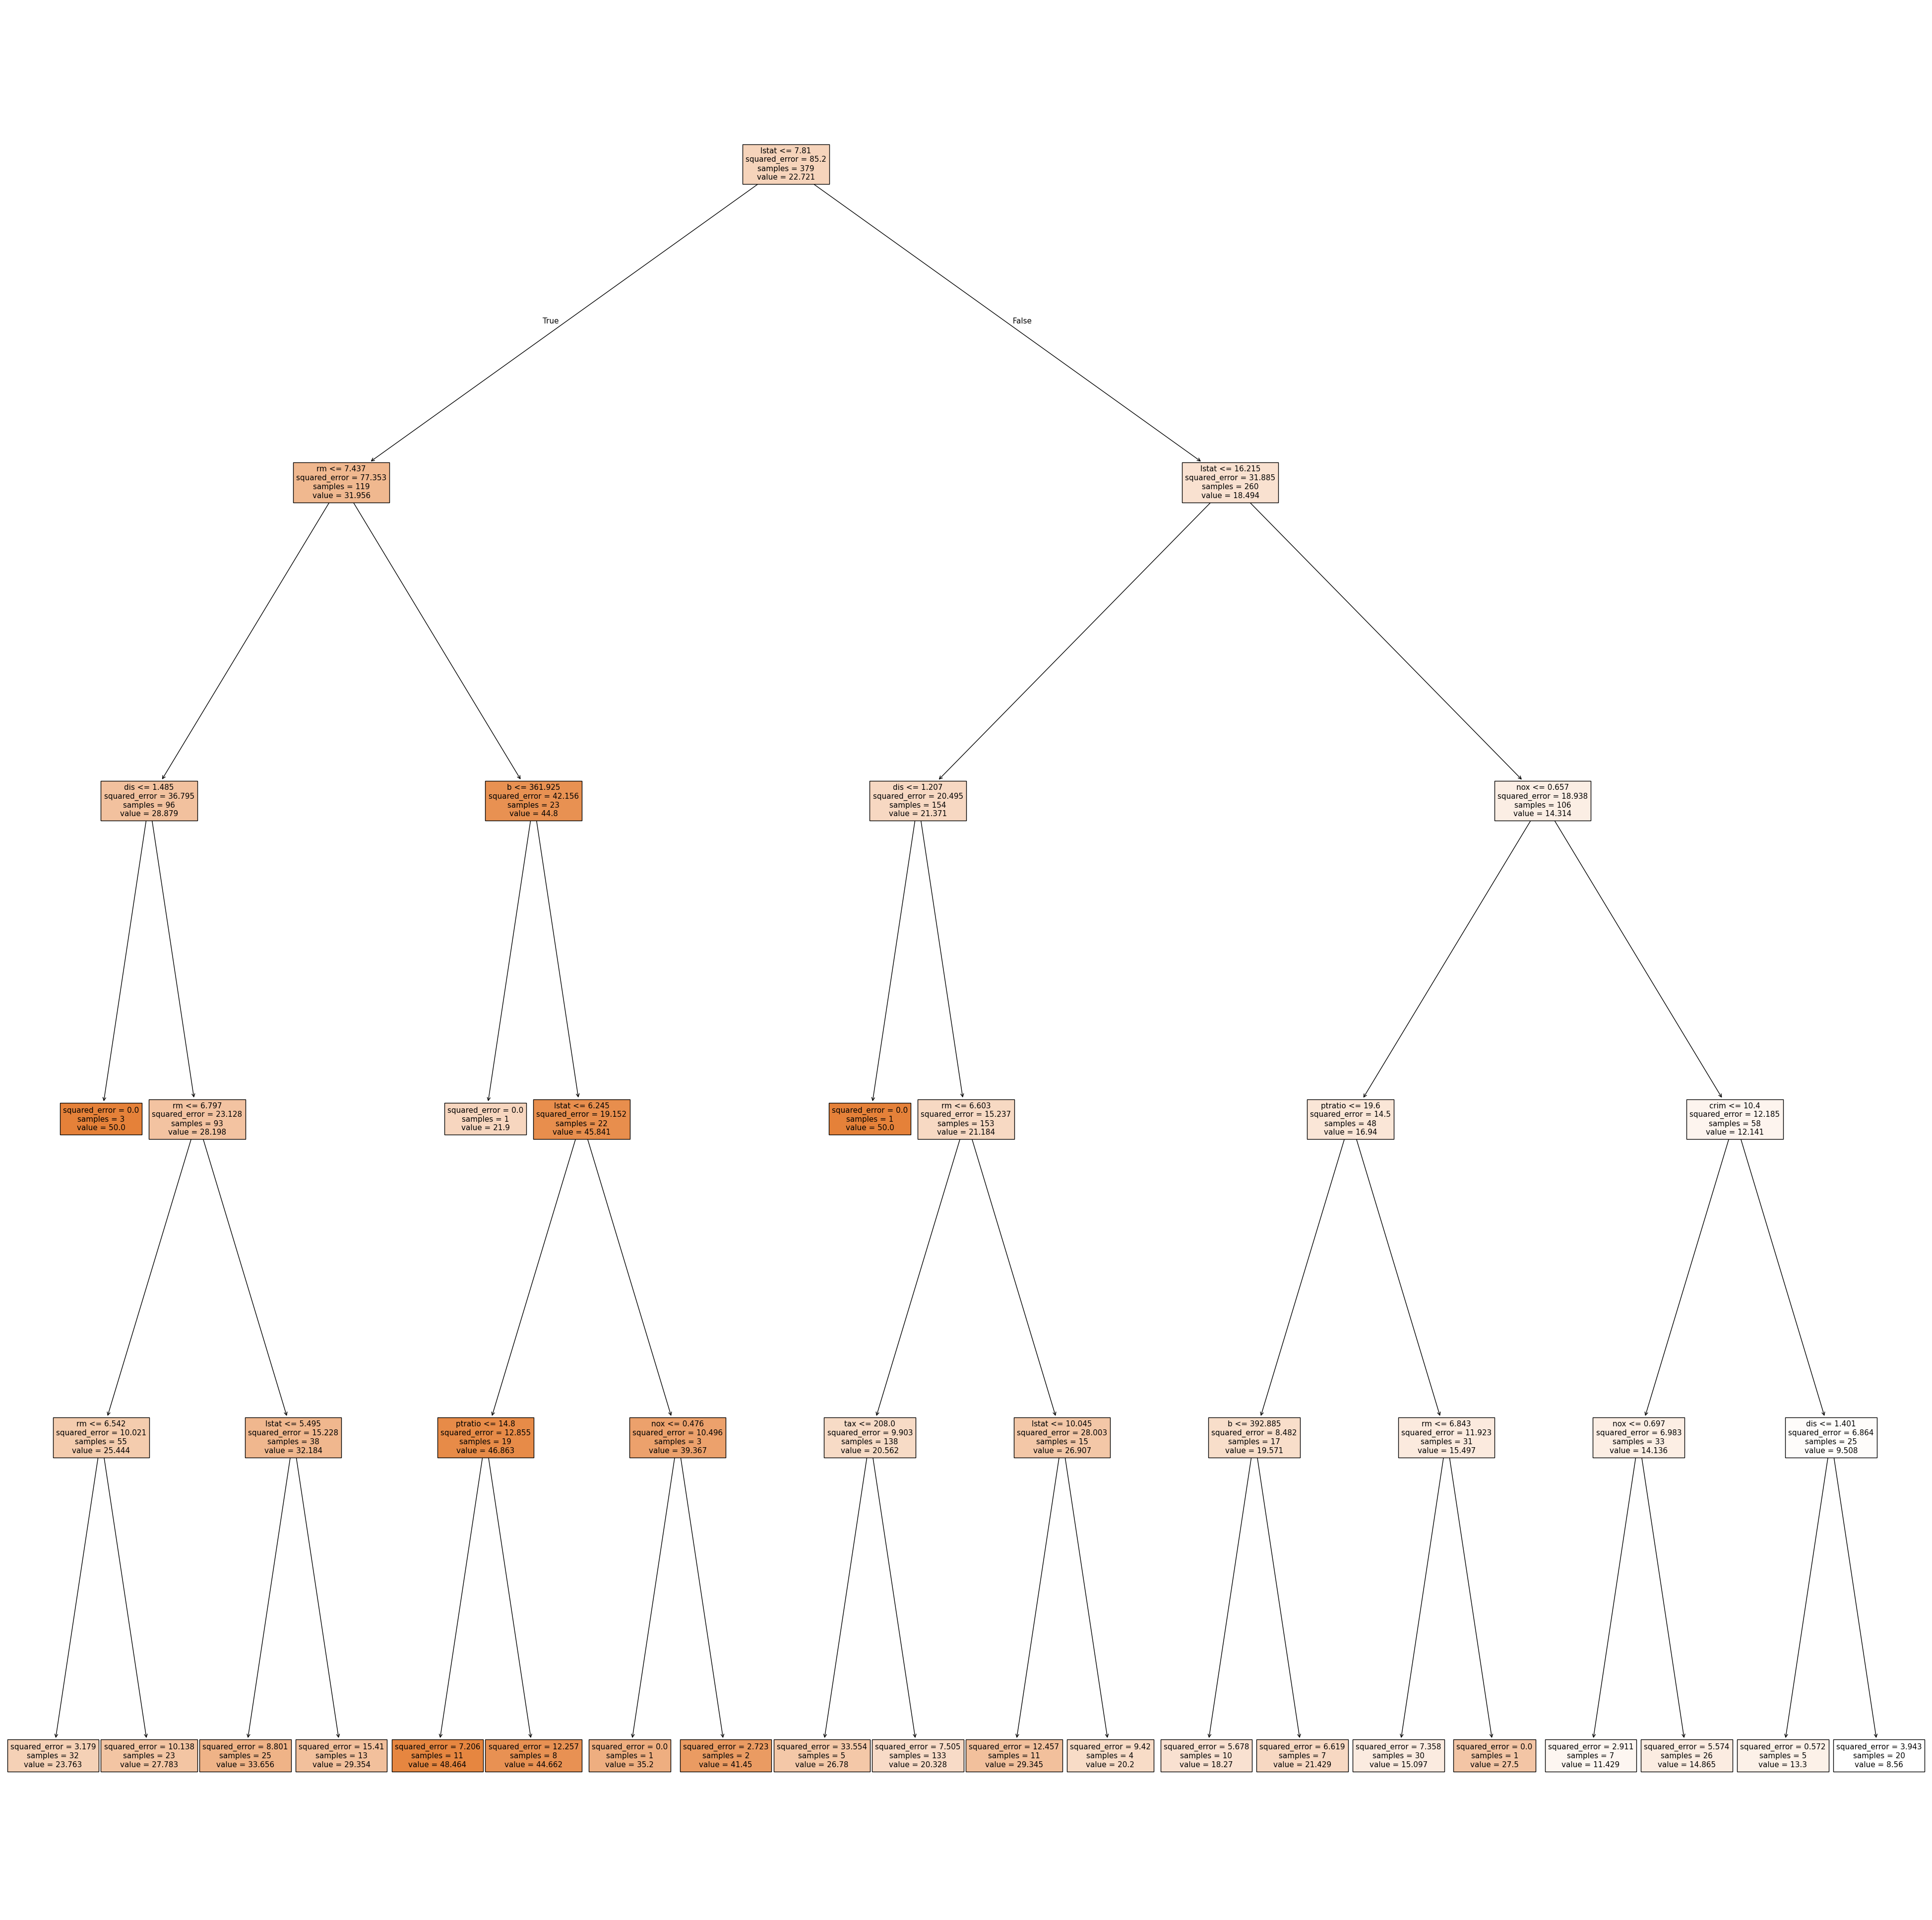

In [21]:
plt.rc('figure', figsize=(50, 50))
tp = tree.plot_tree(regr_2,
                    feature_names=X.columns,
                    filled=True)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [23]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([ 0.        ,  0.06871152,  0.10839052,  0.17188188,  0.17656994,
         0.23712507,  0.38417495,  0.39282325,  0.41766918,  0.4807647 ,
         0.52931763,  0.57062593,  0.64734053,  0.80397342,  1.43718567,
         1.44656153,  1.59544404,  2.17675292,  2.69412604,  3.64495716,
         8.24913687, 12.40922016, 39.03826492]),
 'impurities': array([ 7.51862686,  7.58733838,  7.69572891,  7.86761078,  8.04418072,
         8.28130579,  8.66548073,  9.05830398,  9.47597316,  9.95673786,
        10.48605549, 11.05668142, 11.70402195, 12.50799537, 13.94518104,
        15.39174256, 16.9871866 , 19.16393952, 21.85806557, 25.50302273,
        33.7521596 , 46.16137975, 85.19964467])}

Text(0, 0.5, 'Impureza total das folhas')

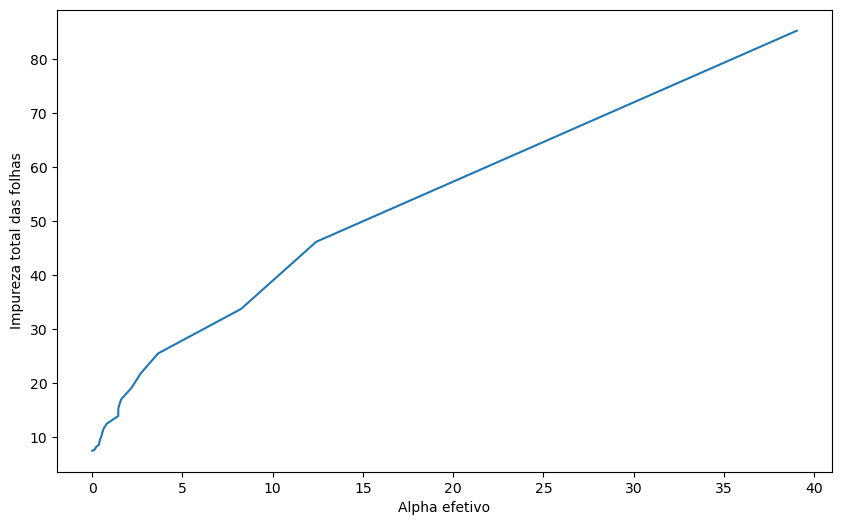

In [25]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [29]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

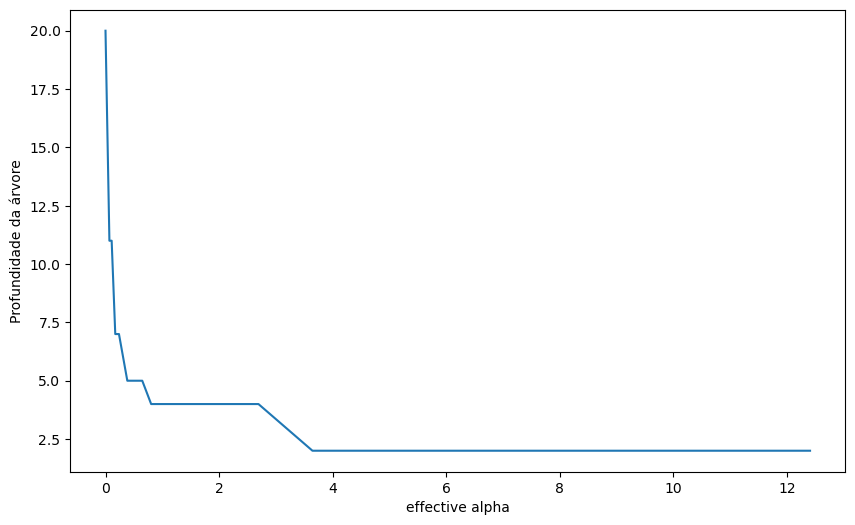

In [31]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [33]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

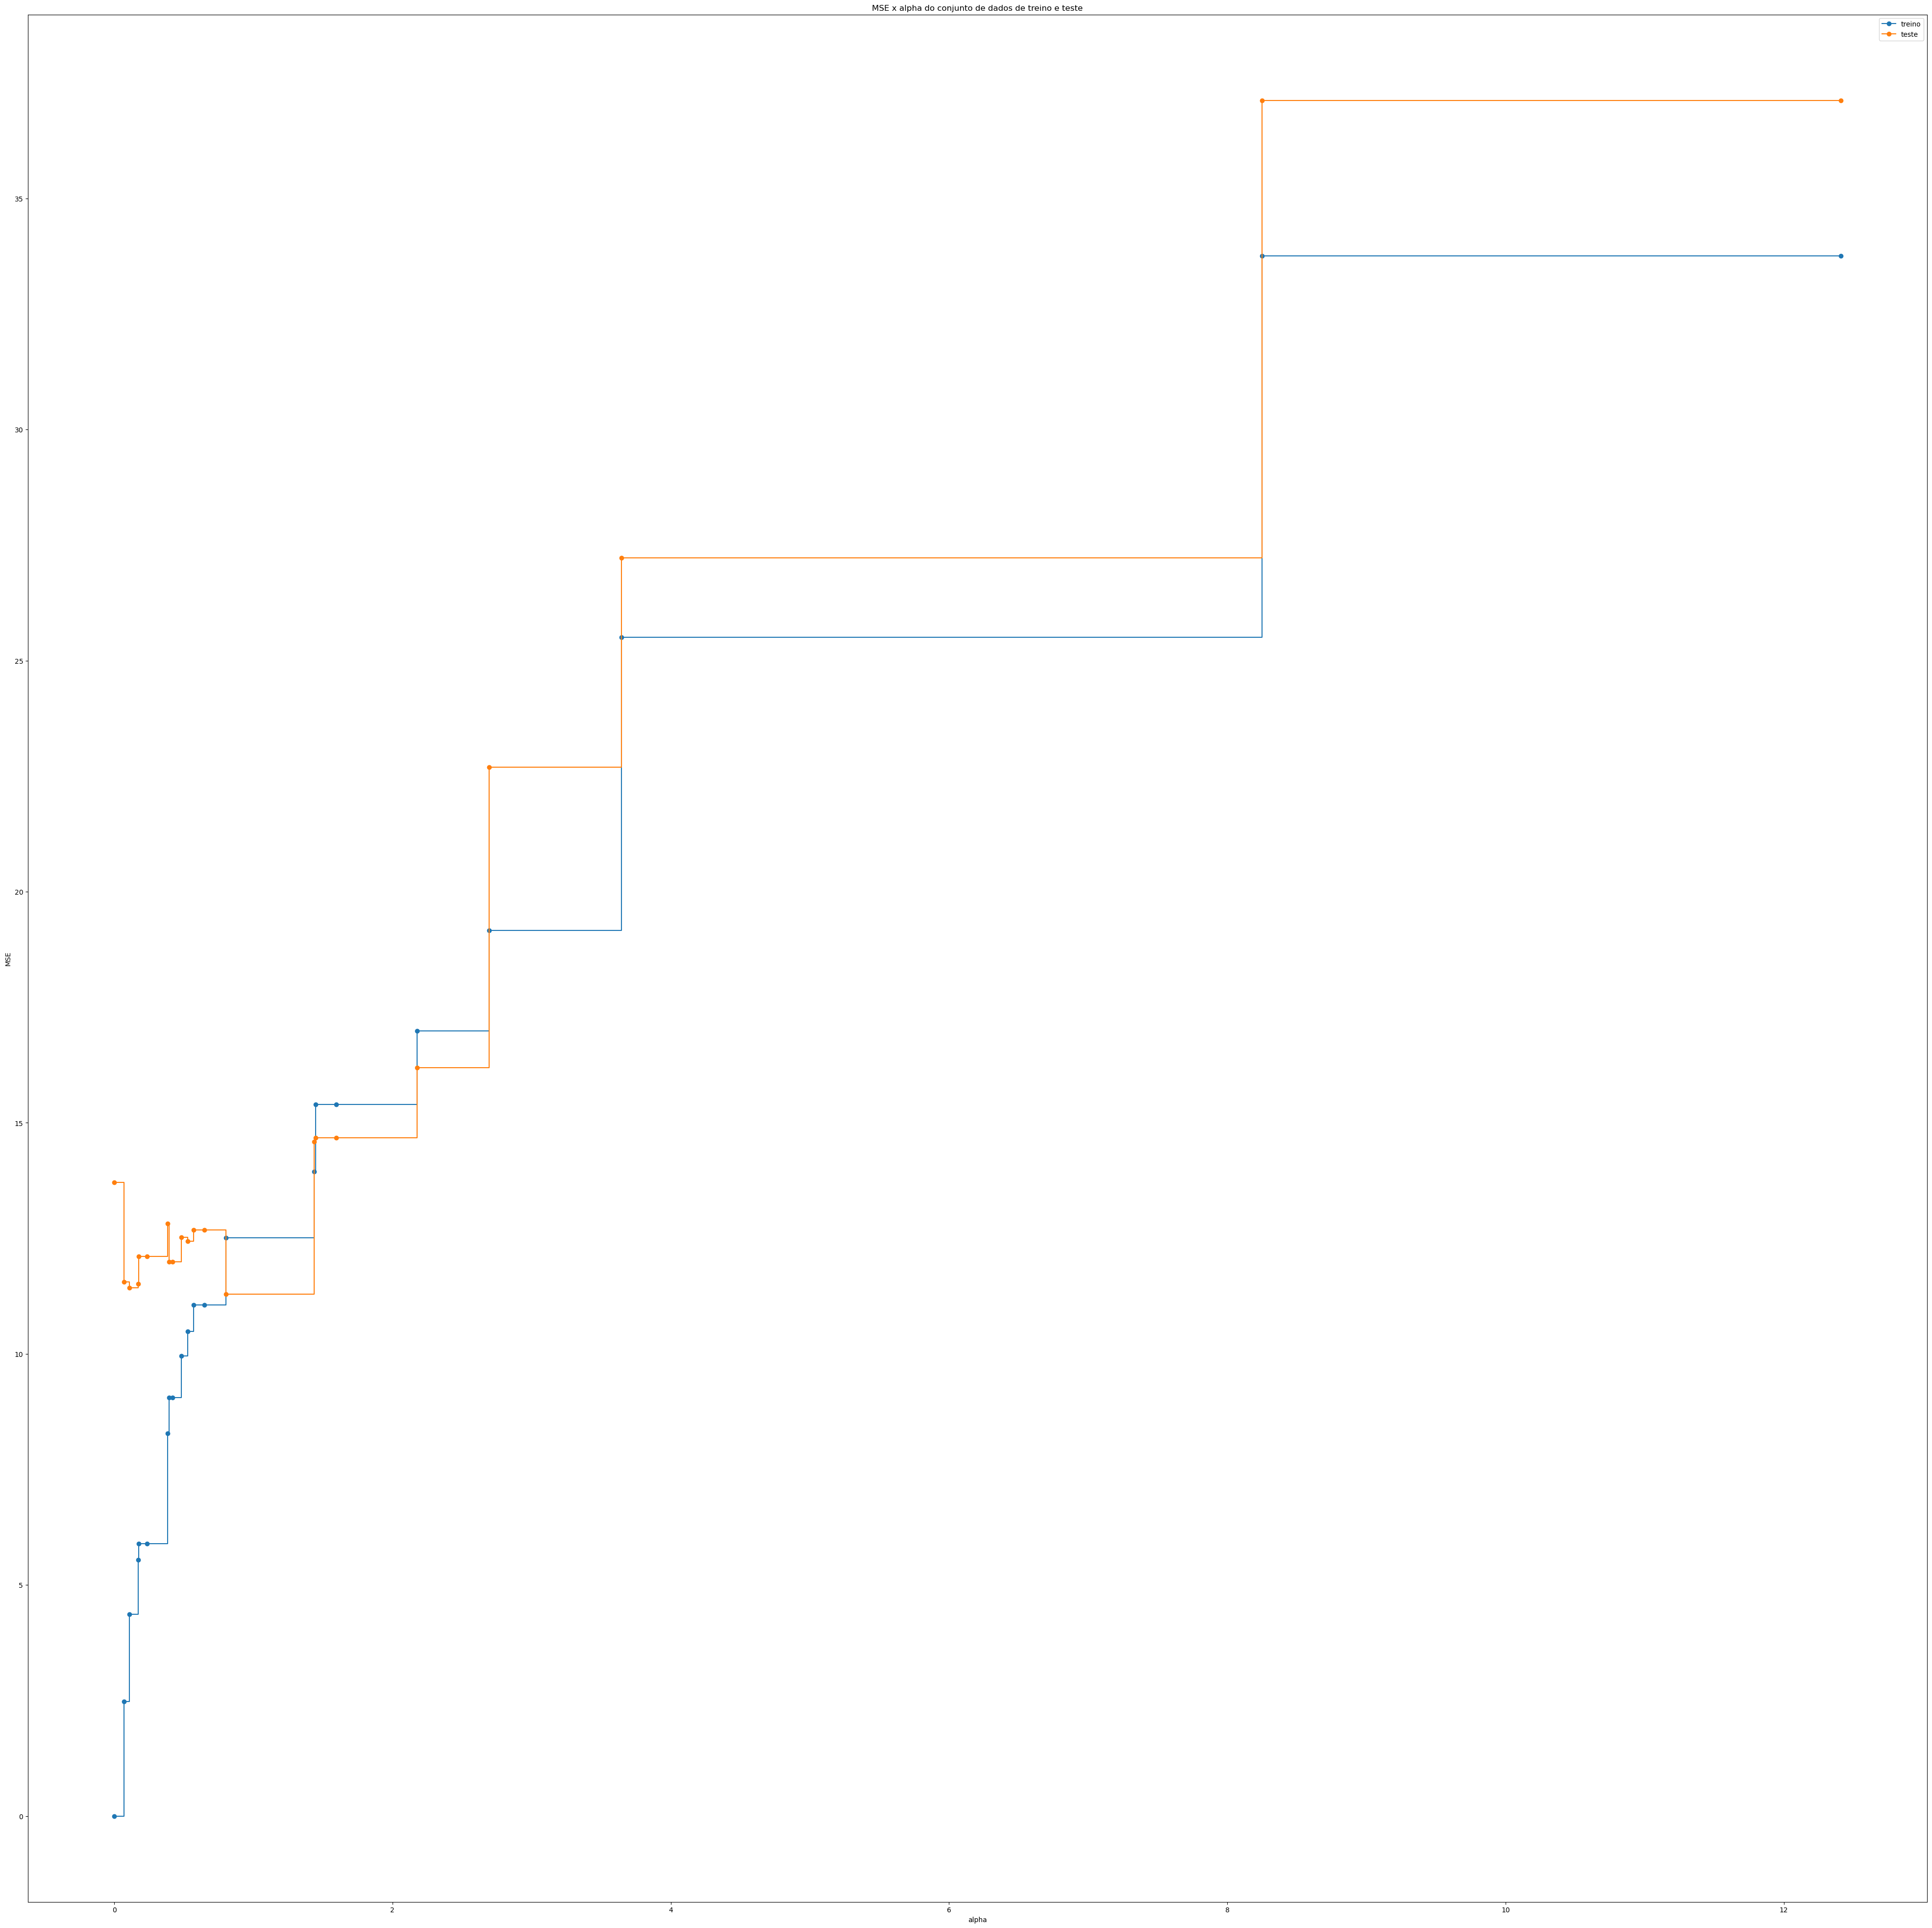

In [35]:

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

# alpha= 1.5; MSE= 18

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [37]:
final_tree = DecisionTreeRegressor(ccp_alpha = 1.5)
final_tree.fit(X_train, y_train)

r_quadrado1 = final_tree.score(X_train, y_train)
r_quadrado1

0.8193449911573851

### 7. Visualize esta árvore.

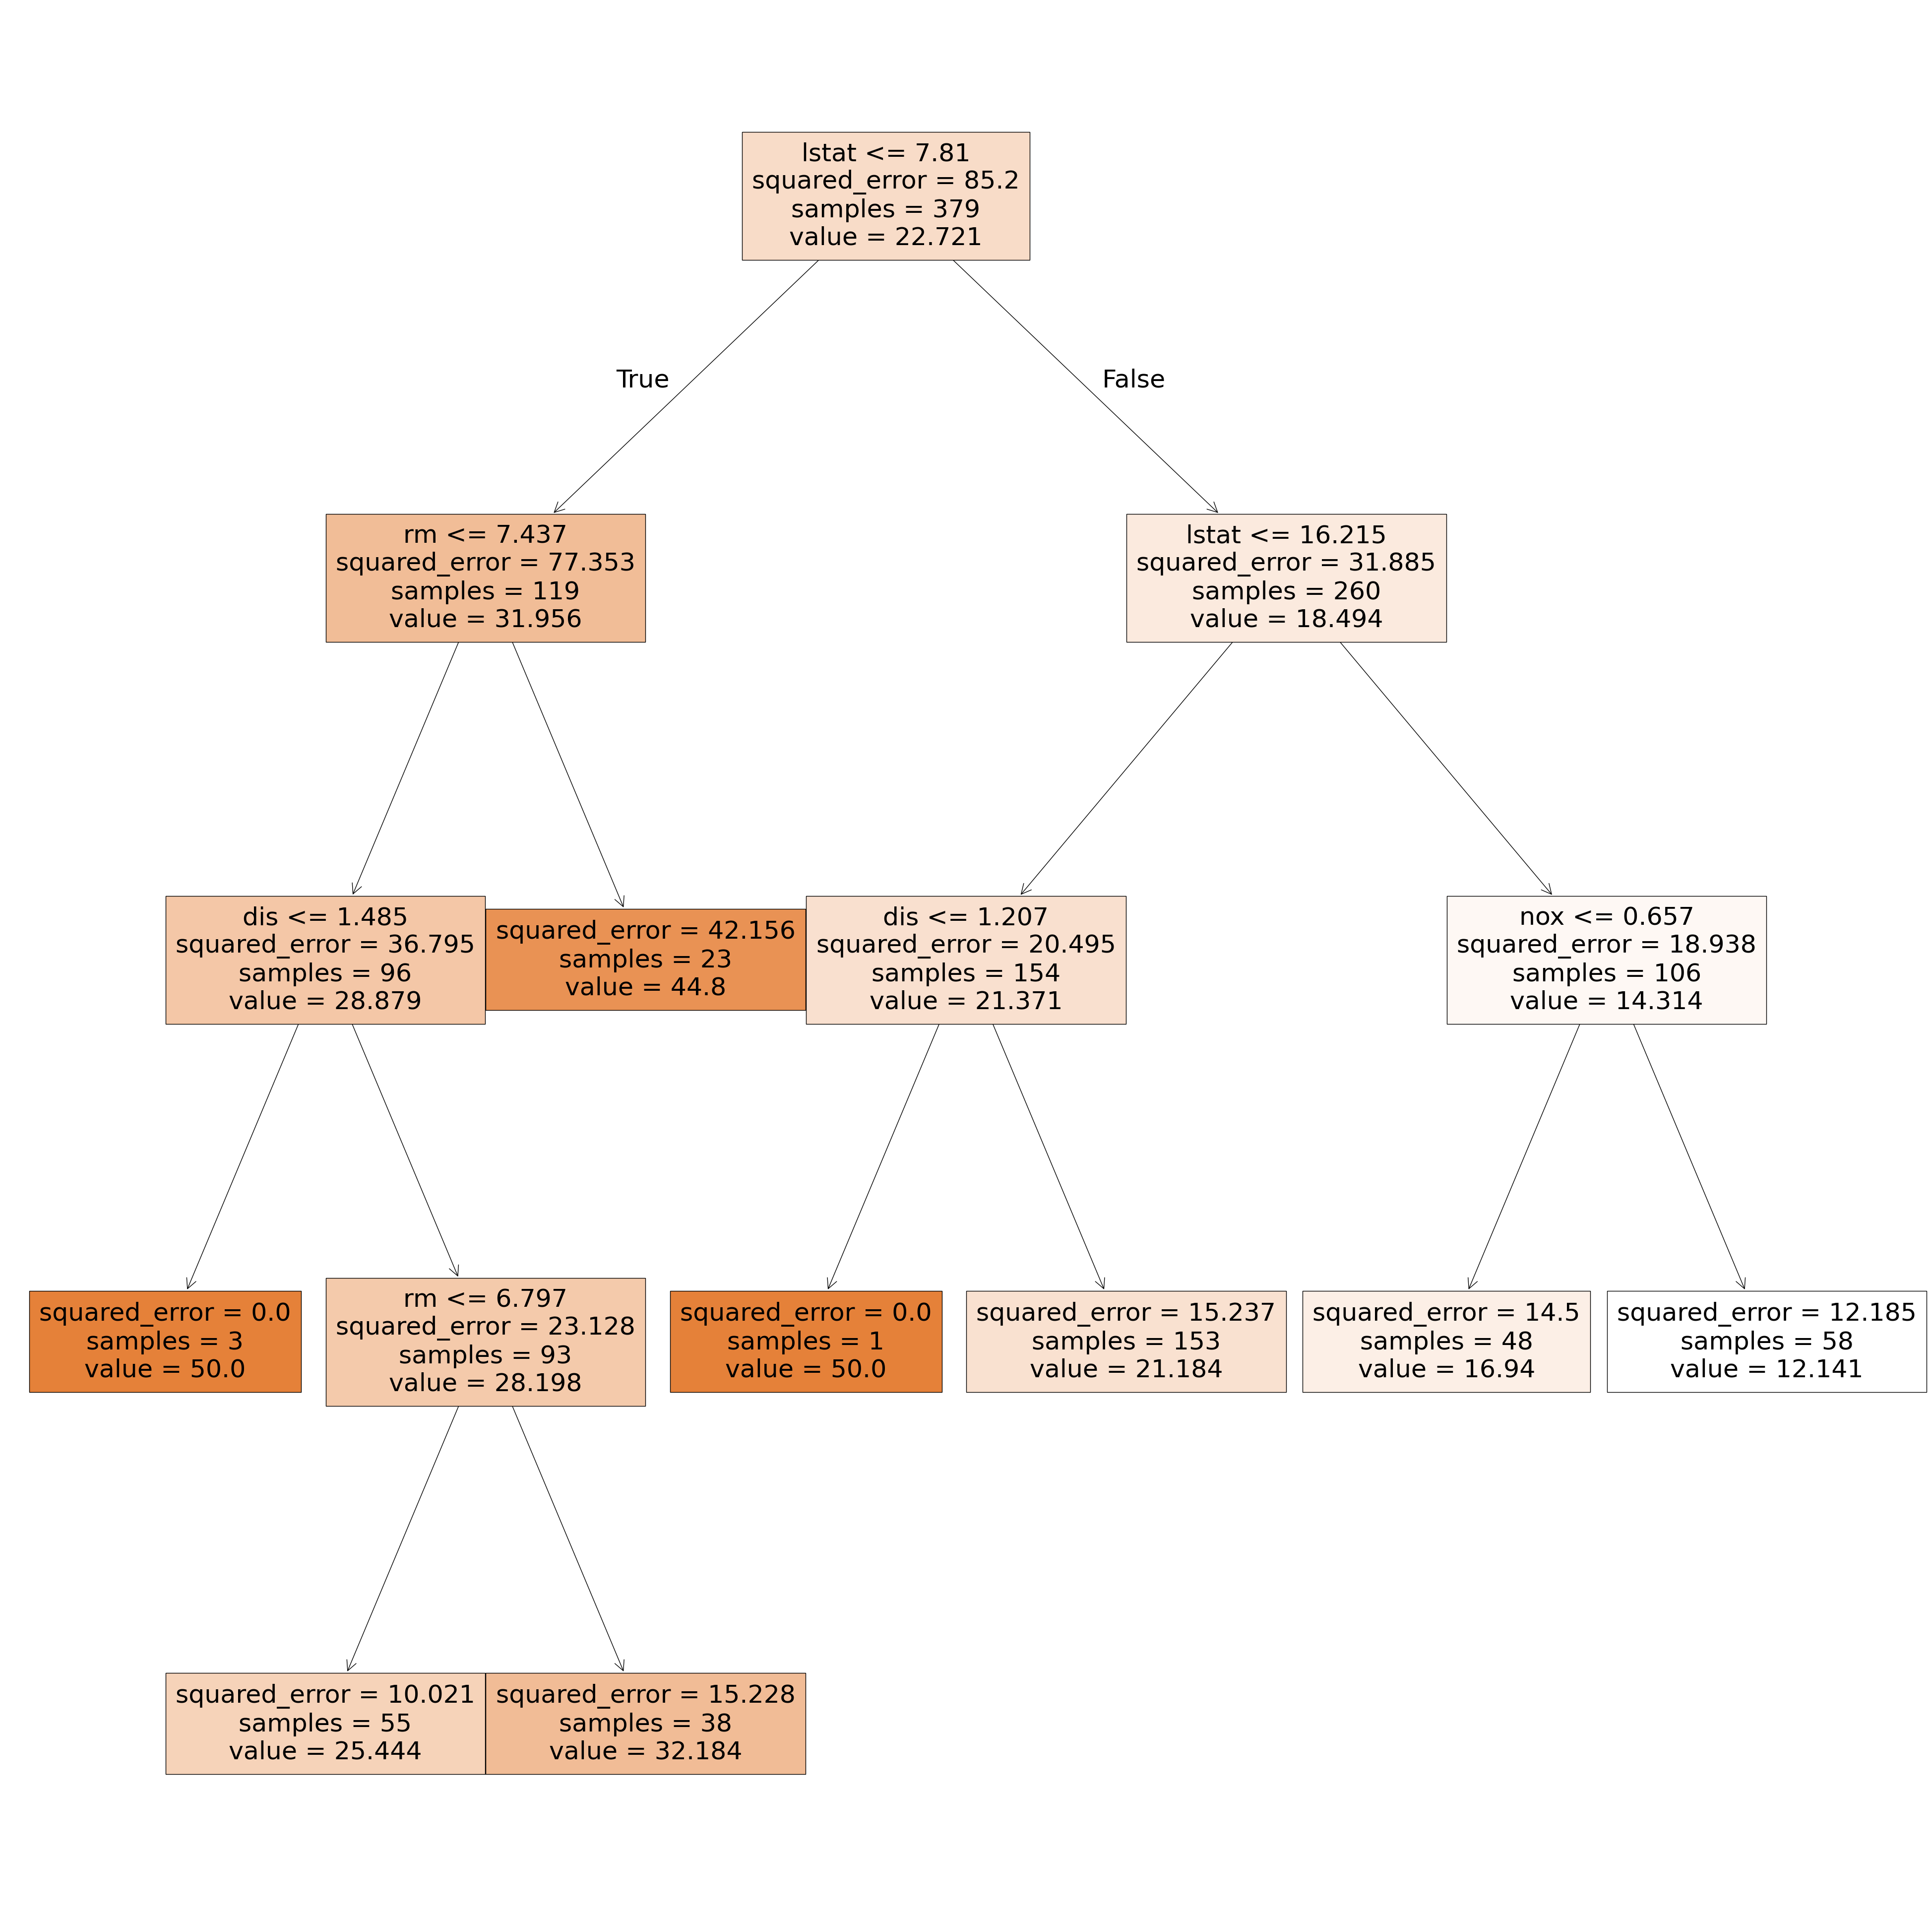

In [39]:
plt.rc('figure', figsize=(50, 50))
tp = tree.plot_tree(final_tree,
                    feature_names=X.columns,
                    filled=True)